# Hierarchical Clustering

This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.

A data frame with 50 observations on 4 variables.

- Murder numeric Murder arrests (per 100,000)
- Assault numeric Assault arrests (per 100,000)
- UrbanPop numeric Percent urban population
- Rape numeric Rape arrests (per 100,000)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

Basari, harcama, suc oranlari gibi icerigi olan datalarda gruplandirma yaparken musteri cok fazla yol gosterici olmaz, bizim yorumlarimiz daha cok anlam kazanir. Bu gruplandirma islemleri, clustering algoritmalarinin en cok kullanildigi alanlardir. 

Mesela basarinin olculdugu bir datada basarili, basarisiz, orta seviyede basarili gibi 3 cluster islemi yapildiginda Silhouette skoru cok kotu ise daha fazla cluster islemi yapilip cok basarili, basarili gibi yeni cluster' lar eklenebilir. 

Elimizdeki data, 1973 yilinda Amerika' daki 50 eyaletin her biri icin gerceklesen tutuklamanin ne kadarinin cinayet, ne kadarinin fiziki saldiri, ne kadarinin tecavuz suclamalarindan gerceklestigini veren bir data. 

__UrbanPop__ --> Bir eyaletin ilcesindeki nufusun genel eyaletin nufusuna olan orani.

Datadaki eyaletler isimleri de bir feature' di. index_col=0 islemi ile bu feature' i index olarak atamis olduk :

In [4]:
df = pd.read_csv("USArrests.csv", index_col=0)

In [5]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


## Exploratory Data Analysis and Visualization

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


Describe' a bakarsak datamizin bir scale islemine ihtiyaci oldugunu goruyoruz :

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


Asagidaki dagilim bize cok net bir inside saglamiyor. Belki Murder ve Assault arasinda 2 class' lik bir ayrim yapilacagi soylenebilir. Pairplot bize cok fazla bir inside saglamadigi icin asagida bir de barplot grafiklerine bakacagiz :

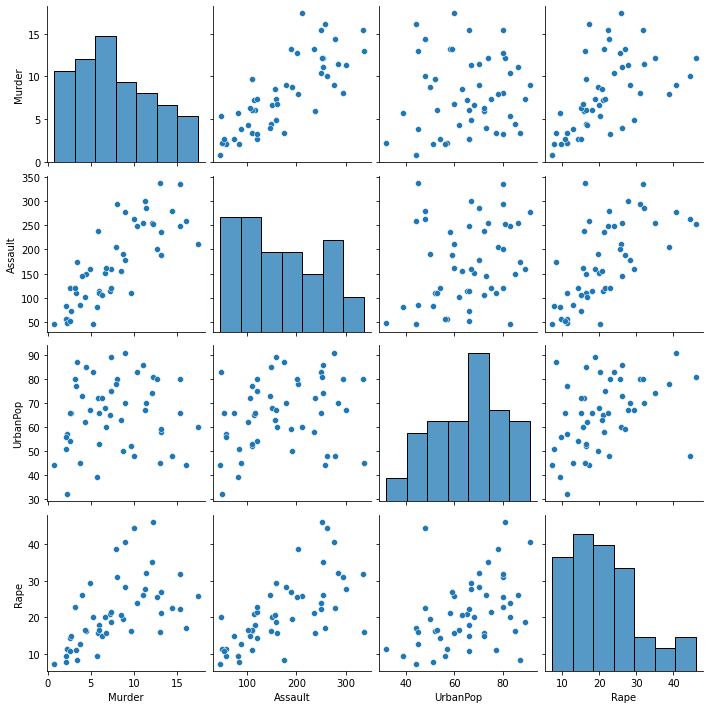

In [8]:
sns.pairplot(df);

Asagida Murder, Assault ve Rape'e gore eyalet isimlerini yazdirdik. Siralamayi da bu feature' lara gore yapmasini istedik. Bunlara bakarak; sucun cok oldugu,  az oldugu, orta derecede oldugu eyaletler gibi bir ayrim yapabiliriz. Sadece bu gorsellere bakarak bile datayi 3 cluster' a bolmemiz gerektigi bilgisini aldik. Bunu metriklerimiz ile teyit edecegiz :

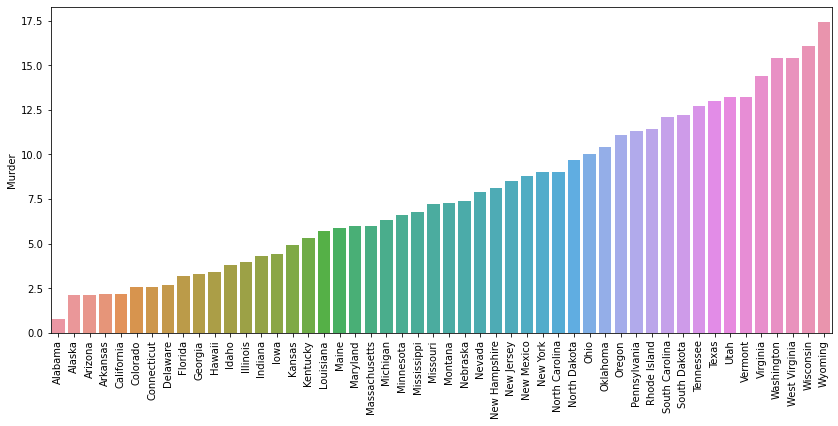

In [9]:
plt.figure(figsize = (14,6))
sns.barplot(y = "Murder", x = df.index, data = df, order = df.Murder.values.sort())
plt.xticks(rotation = 90);

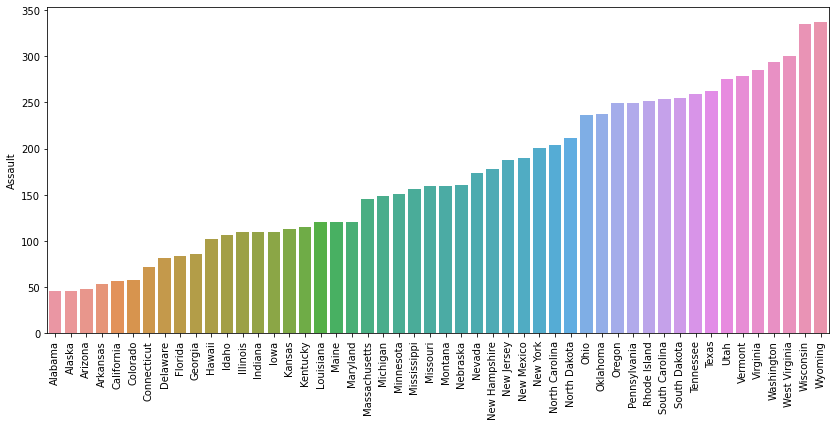

In [10]:
plt.figure(figsize = (14,6))
sns.barplot(y = "Assault", x = df.index, data = df, order = df.Assault.values.sort())
plt.xticks(rotation = 90);

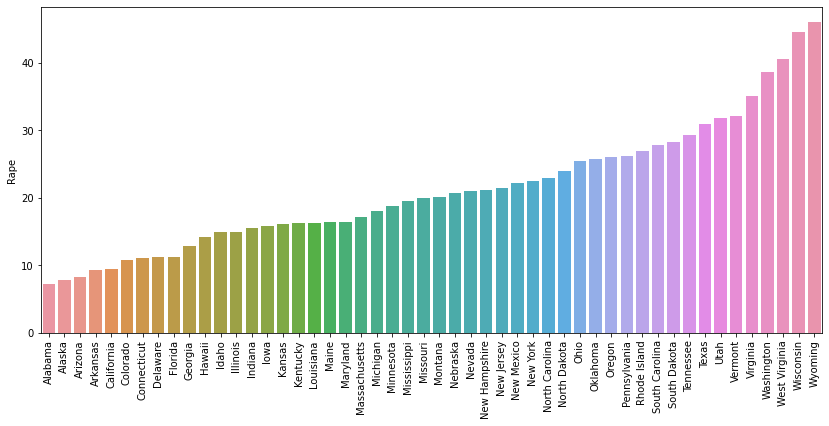

In [11]:
plt.figure(figsize = (14,6))
sns.barplot(y = "Rape", x = df.index, data = df, order = df.Rape.values.sort())
plt.xticks(rotation = 90);

## Hopkins Test

- Hopkins test, a statistical test for randomness of a variable.
- Null Hypothesis (Ho) : Data points are generated by non-random, uniform distribution (implying no meaningful clusters)
- Alternate Hypothesis (Ha): Data points are generated by random data points (presence of clusters)
- The more close 0, the more available to separate clusters

In [12]:
#!pip install pyclustertend

In [13]:
from pyclustertend import hopkins

Hopkins test skoru 0.5' in altinda cikti, iyi bir kumeleme yapabilmemiz olasi gorunuyor :

In [14]:
hopkins(df, df.shape[0])

0.3166210893583002

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Hem MinmaxScaleer hem de StandardScaler islemi ile skorlara bakmak istedigimiz icin df' in iki tane kopyesini aldik :

In [16]:
df1 = df.copy()
df2 = df.copy()

In [17]:
hopkins(MinMaxScaler().fit_transform(df1), df1.shape[0])

0.20693446968811494

In [18]:
hopkins(StandardScaler().fit_transform(df2), df2.shape[0])

0.2161343187125487

Iki scaler isleminde de asagi yukari ayni sonuclar dondu. Biz burada MinMaxScaler' i tercih ettik ve buna gore egitimimizi yaptik :

In [19]:
scaler = MinMaxScaler()

In [20]:
df_scaled = scaler.fit_transform(df)

In [21]:
X = pd.DataFrame(df_scaled, columns=df.columns)

## Dendrogram

- Tree-like hierarchical representation of clusters is called a dendrogram.   
- It illustrates the arrangement of the clusters produced by the corresponding analyses.

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [23]:
#dendrogram()

**“linkage” parameter: (default= “ward”)**

  {‘ward’, ‘complete’, ‘average’, ‘single’}

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. 
-	Ward minimizes the variance of the clusters being merged.
-	Average uses the average of the distances of each observation of the two sets.
-	Complete or maximum linkage uses the maximum distances between all observations of the two sets.
-	Single uses the minimum of the distances between all observations of the two sets.


Linkage degiskenlerimizi tanimladik. Bunlarin hepsine gore birer dendogram cizdirip en iyi olan skoru sececegiz :

In [24]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

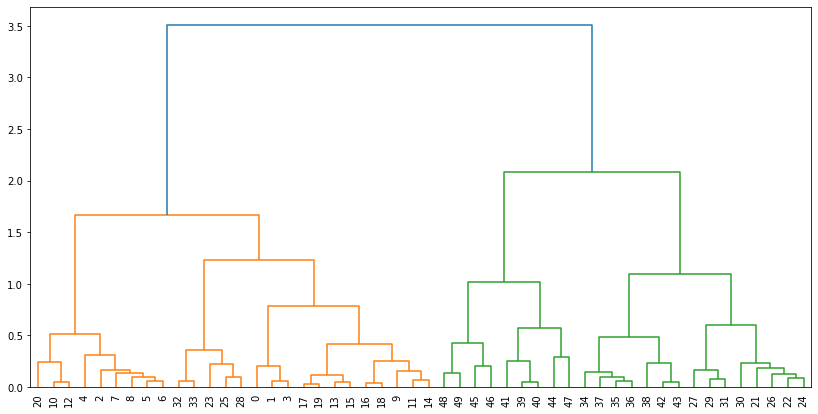

In [25]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 10);   

Ward, cluster=2' yi tavsiye etti. Fakat yukaridaki gorsellerden 3 cluster yapabilecegimizi ongormustuk ve boyle bir gurplandirma datasinda musteriye bagimli degiliz, daha ozgur secimler yapabiliriz.

Yukaridaki koda __show_contracted = True__ parametresini ilave ettik. Bu parametre cluster' larin sonuna centikler atar ki bu centik sayisi bize aslinda asagida kac tane daha cluster oldugunu gosterir :

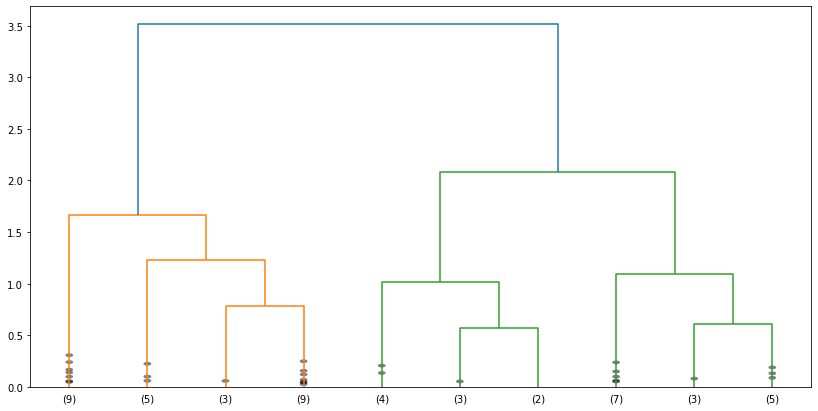

In [26]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           leaf_font_size = 10);

Yukarida tanimladigimiz butun degiskenlere gore asagida dendogramlari cizdirdik :

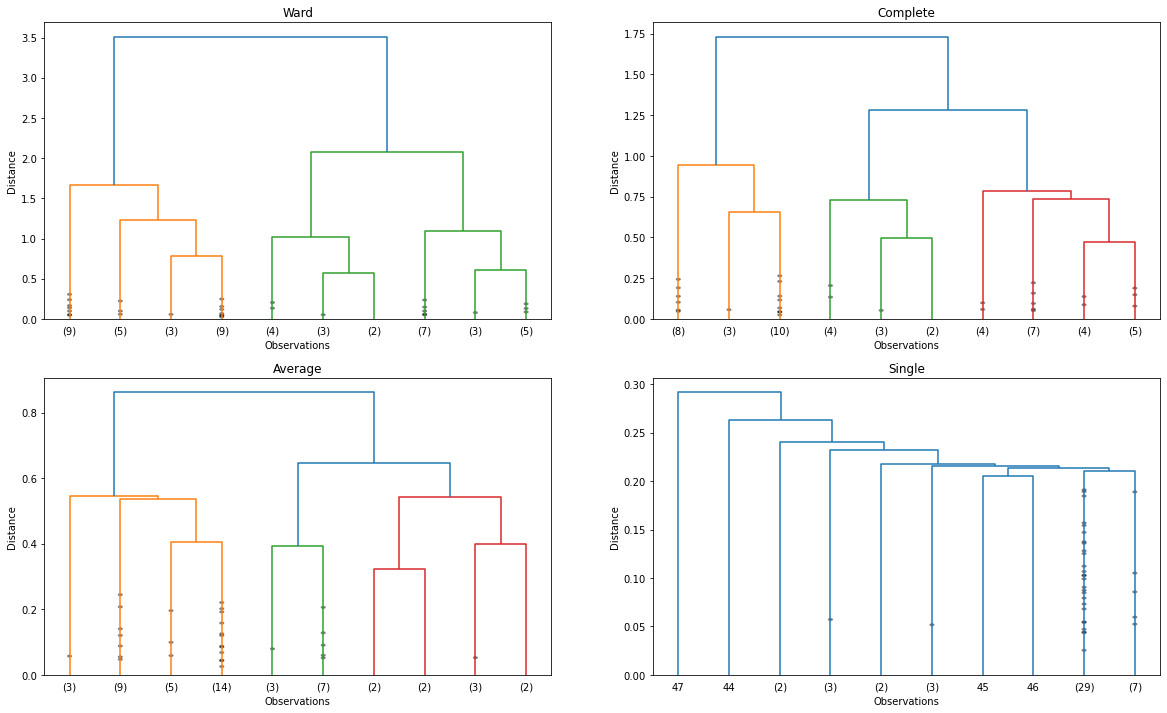

In [27]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

Complete ve Average dendogramindaki mavi cizgiler, cluster=3 almamiz gerektini soyluyor. Bunlar gorselde aldigimiz bilgiyi desteklediler. Bunlari da dikkate alarak cluster=3 sececegiz. Bunlardan net bir bilgi alamasak bile 3 cluster secebilirdik. Cunku yukaridaki barplot grafikleri bize bu bilgiyi sagladi.

## Hierarchical Clustering (Agglomerative)

- Ideal clustering is characterised by minimal intra cluster distance and maximal inter cluster distanc

In [28]:
from sklearn.cluster import AgglomerativeClustering

### S(Silhouette) Score

- If the ground truth labels are not known, evaluation must be performed using the model itself. (One of the evaluation method is Silhouette Coefficient)
- A higher Silhouette Coefficient score relates to a model with better defined clusters. 
- a :The mean distance between a sample and all other points in the same class.
  b: The mean distance between a sample and all other points in the next nearest cluster.

s = (b-a) / max(a,b)

Yukaridaki bilgilere bakarak cluster=3 secmeye karar vermis olsak bile Silhouette skoruna mutlaka bakmaliyiz. 

In [29]:
from sklearn.metrics import silhouette_score

Gorsellerden cluster=3 cikarimini yapmis olsak bile, asagidaki Silhouette skoru bize cluster=2' yi secmemiz gerektigini soyluyor. Gorseller ile aldigimiz skorlar farkli bilgiler veriyor. Bu durumda, acaba datamizin kalitesini dusuren birseyler mi var sorusu aklimiza gelmelidir. 

In [30]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df, model.labels_)}')

Silhouette Score for 2 clusters: 0.45421907210414214
Silhouette Score for 3 clusters: 0.3180902156279954
Silhouette Score for 4 clusters: 0.13602999771899232
Silhouette Score for 5 clusters: 0.16195986543258523
Silhouette Score for 6 clusters: 0.22945281939930115
Silhouette Score for 7 clusters: 0.24214267818856985
Silhouette Score for 8 clusters: 0.3051367809988358
Silhouette Score for 9 clusters: 0.29774346557180853
Silhouette Score for 10 clusters: 0.2936409237035898


In [31]:
X.head()

,Murder,Assault,UrbanPop,Rape
0,0.000000,0.000000,0.440678,0.000000
1,0.078313,0.003425,0.271186,0.012920
2,0.078313,0.010274,0.813559,0.025840
3,0.084337,0.027397,0.305085,0.051680
4,0.084337,0.037671,1.000000,0.056848


cluster=3 secerek modelimizi olusturduk. tahminlerimizi X datasina feature olarak ekledik. Daha sonra Murder ve Assault feature' larini tahminlerimizin oldugu cluster' a gore gorsellestirdik. 

In [32]:
model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(X)
X["cluster"] = clusters

Murder ve Assault feature' lari arasinda yuksek bir corr iliskisi oldugunu goruyoruz, ikisi de artma egiliminde. 3 cluster' a gore az suc isleyenler ile cok suc isleyenlerin iyi ayirt edildigini (mor ve sari renk); orta seviyede suc isleyenlerin ise (yesil renk) diger cluster' lar ile grift durumda oldugunu goruyoruz :

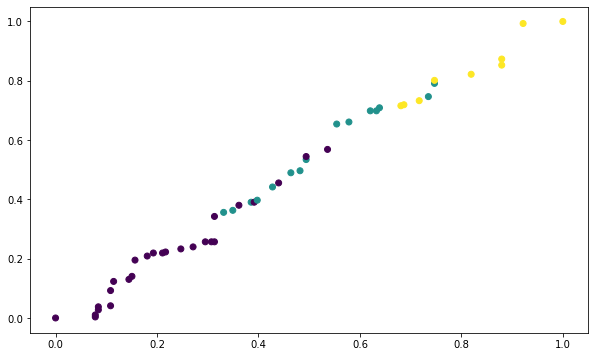

In [33]:
plt.scatter(X.Murder, X.Assault, c = clusters, cmap = "viridis")

Asagida Murder' a gore populasyona bakma istedik. x ekseni Murder, y ekseni populasyona karsilik geliyor. Bu grafikte class' larin birbirine cok grift oldugunu goruyoruz. Bu bilgiye gore populasyonu incelememiz gerekir :

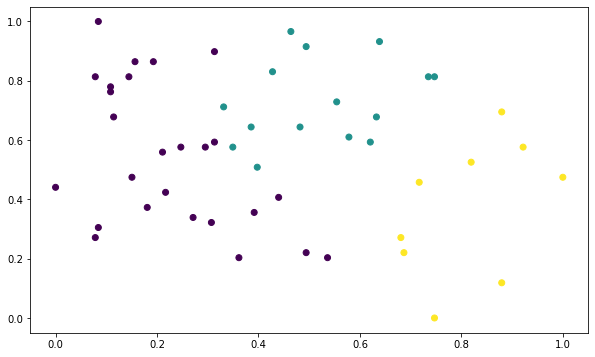

In [34]:
plt.scatter(X.Murder, X.UrbanPop, c = clusters, cmap = "viridis")

Elimizde musteriden gelen bir label olmadigi icin tahminlerimize gore bir gruplandirma yaparak bunu gorsellestirdik : 

In [35]:
clus_pred = X.groupby("cluster").mean().T
clus_pred

cluster,0,1,2
Murder,0.226135,0.522490,0.814592
Assault,0.215227,0.561872,0.834475
UrbanPop,0.543025,0.731073,0.370998
Rape,0.190320,0.428079,0.736721


cluster=3' e gore Murder ve Assault ve Rape' de class' larin birbirinden cok iyi ayristigini goruyoruz. UrbanPop diger feature' lar kadar iyi bir ayrisim yapamamis ama yine de nispeten iyi bir ayrim oldugunu soyleyebiliriz. Bu gorselden herhangi bir inside elde edemedik. Asagida bir de boxplot' a bakalim.

<AxesSubplot:>

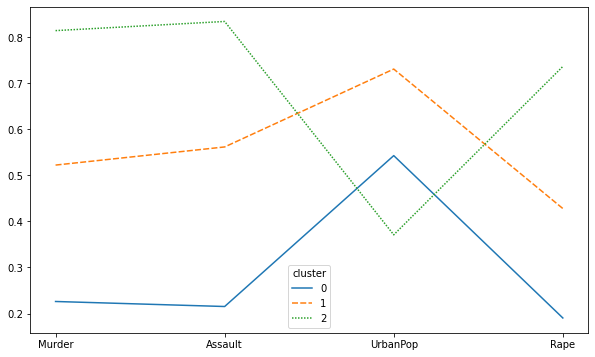

In [36]:
sns.lineplot(data = clus_pred)

Asagida class' lara gore boxplot' lari cizdirdik :

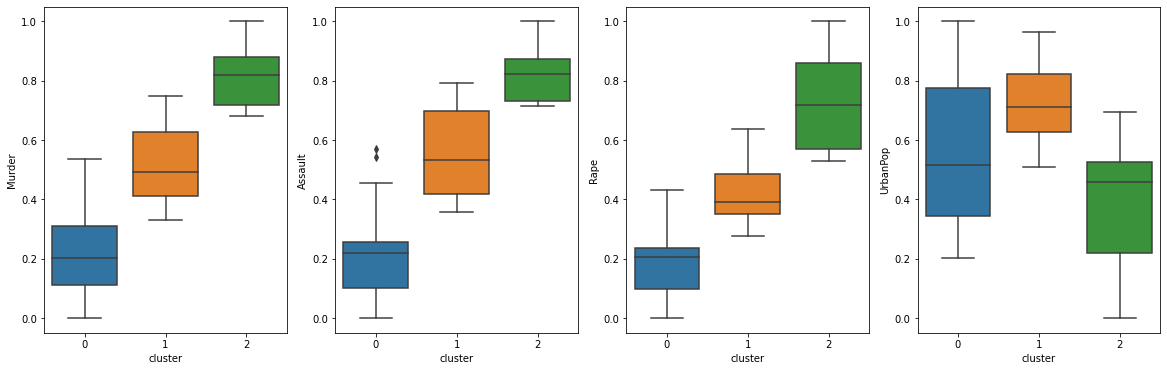

In [37]:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "Murder", x = "cluster", data = X)

plt.subplot(142)
sns.boxplot(y = "Assault", x = "cluster", data = X)

plt.subplot(143)
sns.boxplot(y = "Rape", x = "cluster", data = X)

plt.subplot(144)
sns.boxplot(y = "UrbanPop", x = "cluster", data = X);

Tahminlerimiz olan cluster' lara gore Murder, Assault ve Rape' de datalarin yogun oldugu kisimlarin birbirleriye grift olmadiklarini goruyoruz. Whiskers' larda hafif sarkmalar var ama bunlar cok da onemli degil,onemli olan yogun bolgeler. Fakat UrbanPop' da datalarin yogun oldugu kisimlarin birbirlerine grift durumda oldugunu goruyoruz. Yukaridaki mean degerlerinden bir inside elde edememistik fakat boxplot' lari inceleyerek bir inside saglayabildik. Bu modelde gorsellestirme cok onemlidir.

In [38]:
X.cluster.value_counts()

# Modelimiz 3 cluster' a gore 50 eyaletten 26' sini suclarin dusuk oldugu yere, 15 tanesini orta, 9 tanesini de suclarin cok yuksek oldugu yere atamis.

0    26
1    15
2     9
Name: cluster, dtype: int64

Modelimizin kalitesini dusuren UrbanPop sutununu datadan atarak modelimizi yeniden kuracagiz :

In [39]:
X2 = X.iloc[:, [0,1,3]]
X2.head()

,Murder,Assault,Rape
0,0.000000,0.000000,0.000000
1,0.078313,0.003425,0.012920
2,0.078313,0.010274,0.025840
3,0.084337,0.027397,0.051680
4,0.084337,0.037671,0.056848


## Hopkins test

Datamizin yeni hali ile Hopkins test skorumuz iyilesti :

In [40]:
hopkins(X2, X2.shape[0])

0.07237476567669528

In [41]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

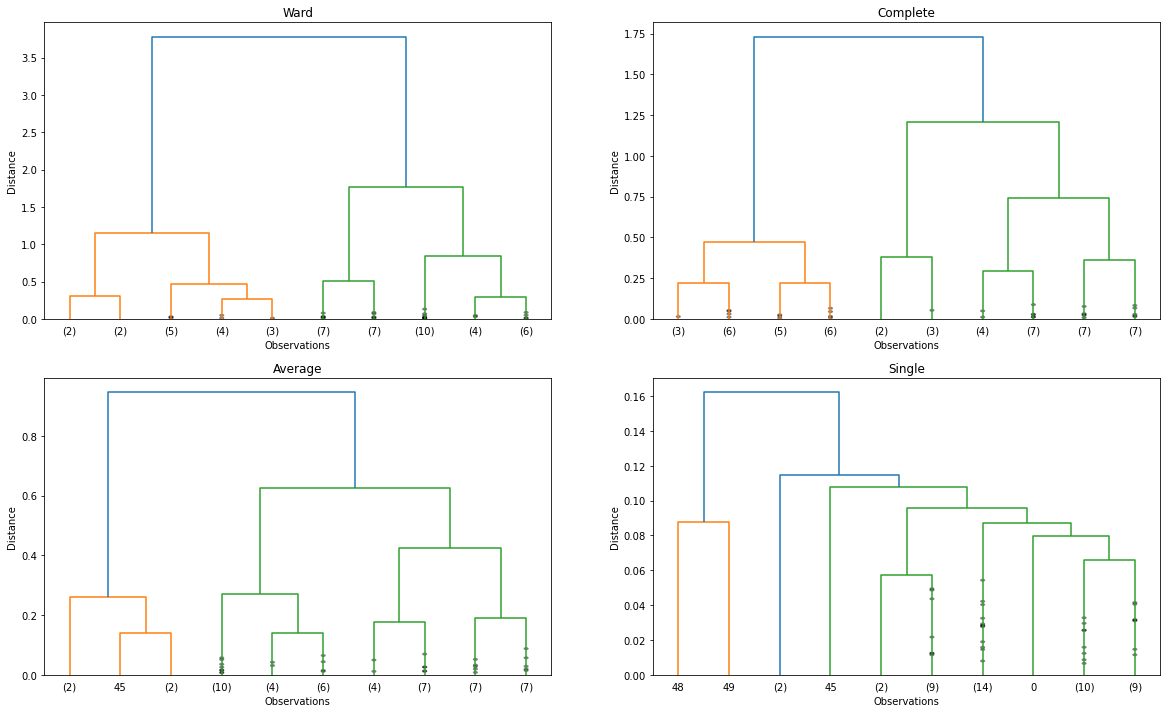

In [42]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

Datamizin yeni haliyle sadece single parametresi cluster=3 secmemizi soyluyor. Diger degerlercluster=2 secmemizi soyluyor. Yeni modele gore yeniden  Silhouette skorlarina bakmamiz ve gorsellerden destek almamiz gerekiyor :

In [43]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df, model.labels_)}')

Silhouette Score for 2 clusters: 0.5843563041221426
Silhouette Score for 3 clusters: 0.5408473507473215
Silhouette Score for 4 clusters: 0.49680242574181405
Silhouette Score for 5 clusters: 0.4610301160129345
Silhouette Score for 6 clusters: 0.45309851046082883
Silhouette Score for 7 clusters: 0.39604153006494913
Silhouette Score for 8 clusters: 0.39684807539987044
Silhouette Score for 9 clusters: 0.3700971634671143
Silhouette Score for 10 clusters: 0.36251487312336017


Yeni modelde Slihouette skorlarinin yukseldigini goruyoruz. cluster=3 skoru neredeyse cluster=2 skoruna yaklasmis, 23 puan birden artmis. cluster=3' teki kalitemiz cok arttigi icin, bastaki gorsellerden de cluster=3 secmemiz gerektigi bilgisini elde ettigimiz icin cluster=3 secerek yolumuza devam edecegiz :

In [44]:
final_model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = final_model.fit_predict(X2)
X2["cluster"] = clusters

In [45]:
X2.cluster.value_counts()

# Yeni modelde eyaletler arasi dagilim da daha orantili bir hale geldi. 

1    20
0    16
2    14
Name: cluster, dtype: int64

Secimimizden emin olmak icin her feature icin boxplot grafiklerimizi de inceleyelim :

<AxesSubplot:xlabel='cluster', ylabel='Rape'>

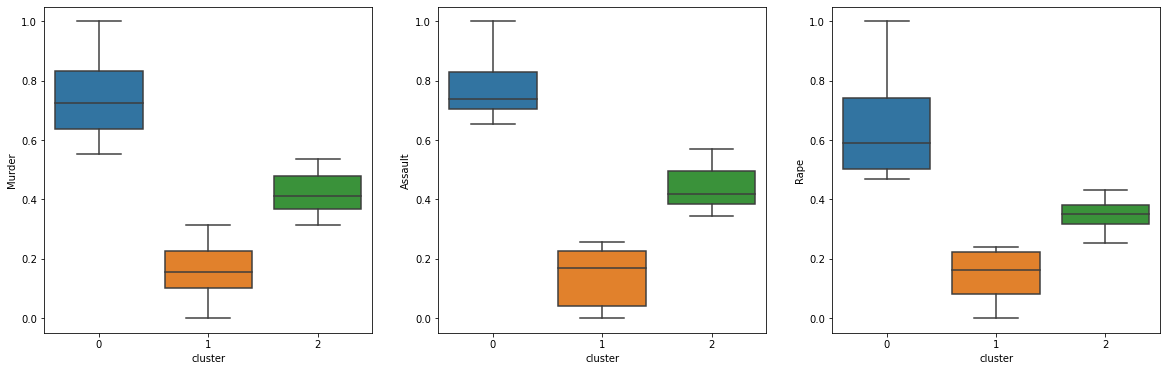

In [46]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Murder", x = "cluster", data = X2)

plt.subplot(132)
sns.boxplot(y = "Assault", x = "cluster", data = X2)

plt.subplot(133)
sns.boxplot(y = "Rape", x = "cluster", data = X2)

Ilk modelde datalarin yogun olduklari bolgeler birbirinden iyi ayrismisti fakat whiskers' larda grift bir durum vardi. Yeni modelimizde whiskers' larin da birbrilerinden oldukca iyi ayristigini gorebiliyoruz. Kumelenme kalitesi oldukca artti.

Dendogram bize cluster=2 secmemiz gerektigini soylese bile biz gorseller ve Silhouette score ile cluster=3 secmemiz gerektiginde karar kildik. Clusteering metodlarinda kullanabilecegimiz butun yontemleri kullanarak en kaliteli clustering' i yaptigimizdan emin olmak cok onemli.

**Evaluation**

- 0 : states with high crime rates
- 1 : states with low crime rates
- 2 : states with medium crime rates

Yukaridaki boxplot degerlerine bakarak 0 class' ina high, 1 class' ina low, 2 class' ina da medium atamasini yaptik. Yukaridaki modelde bu degerler farkliydi, her yeni kurulan modelde class' larin yerleri degisebilir :

Model sonucu elde ettigimiz predict' leri de X2 datasina ekledik :

In [47]:
X2["crime_level"] = X2["cluster"].map({0:"high", 1:"low",2:"medium"})
X2.head()

,Murder,Assault,Rape,cluster,crime_level
0,0.000000,0.000000,0.000000,1,low
1,0.078313,0.003425,0.012920,1,low
2,0.078313,0.010274,0.025840,1,low
3,0.084337,0.027397,0.051680,1,low
4,0.084337,0.037671,0.056848,1,low


In [48]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

Eyalet isimleri datada index idi. Bunlari da datamizin sonuna ekledik :

In [48]:
X2["States"] = df.index
X2

,Murder,Assault,Rape,cluster,crime_level,States
0,0.000000,0.000000,0.000000,1,low,Alabama
1,0.078313,0.003425,0.012920,1,low,Alaska
2,0.078313,0.010274,0.025840,1,low,Arizona
3,0.084337,0.027397,0.051680,1,low,Arkansas
4,0.084337,0.037671,0.056848,1,low,California
5,0.108434,0.041096,0.090439,1,low,Colorado
6,0.108434,0.092466,0.098191,1,low,Connecticut
7,0.114458,0.123288,0.100775,1,low,Delaware
8,0.144578,0.130137,0.103359,1,low,Florida
9,0.150602,0.140411,0.142119,1,low,Georgia


In [50]:
X2[X2.crime_level=="low"]["States"]

0         Alabama
1          Alaska
2         Arizona
3        Arkansas
4      California
5        Colorado
6     Connecticut
7        Delaware
8         Florida
9         Georgia
10         Hawaii
11          Idaho
12       Illinois
13        Indiana
14           Iowa
15         Kansas
16       Kentucky
17      Louisiana
18          Maine
19       Maryland
Name: States, dtype: object

In [51]:
X2[X2.crime_level=="high"]["States"]

34              Ohio
35          Oklahoma
36            Oregon
37      Pennsylvania
38      Rhode Island
39    South Carolina
40      South Dakota
41         Tennessee
42             Texas
43              Utah
44           Vermont
45          Virginia
46        Washington
47     West Virginia
48         Wisconsin
49           Wyoming
Name: States, dtype: object